# Lab 5. Fuzzy Systems

## Task 5.1 The tipping problem

---

### Problem Descriptions
The conceptual problem is to decide how much to tip at a restaurant from the two inputs of Quality of Service and Food Quality.



### Implementation and Results
We solve this problem using fuzzy logic which explains how much should we tip at a restaurent (ranging from 0% to 25%), on the basis of service and food quality (each rated between 0 and 10).<br>

First, we define the linguistic variables, their fuzzy sets and their membership function.<br>
Secondly, we created the fuzzy rules for our problem and aggregated it using fuzzy control system.<br>
Finally, by simulating the fuzzy control system for the specific inputs (quality = 6.5, service = 9.8), we compute the tip percent to be 19.76%.

We are importing the following libraries in our code:
1.   SciKit-Fuzzy: for fuzzy logic related operations
2.   Numpy: for generating efficient arrays. *We could also use simple range() function, but that's not very effective.*



#### Importing the libraries

In [ ]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=05f7b8e1d8829fa058e30931a25e740d7f6affaa41c1e6cf1d3283574c86c017
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


#### Defining Linguistic variables and their membership functions

In [ ]:
# Creating new Antecedent (input) and Consequent (output) Objects
# the format for creating an Antecedent or Consequent Object is
# object_name = ctrl.Antecendent(<Universe>,'<linguistic_var_name>')
# object_name = ctrl.Consequent(<Universe>,'<linguistic_var_name>')

quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')
# Instead of using np.arange() we could also use range()
# np.arange() is more efficient

# Auto-membership function creates membership functions for fuzzy sets of the linguistic variables
# If .automf(3, 5, or 7), it automatically creates the fuzzy set names
# If names (optional) is provided, it overwrites the names
# For n other than 3,5 or 7, n and names parameter are mandatory for the automf function

quality.automf(3, names=['poor', 'average', 'excellent'])
service.automf(3, names=['poor', 'average', 'excellent'])

#tip.automf(3, names=['low', 'medium', 'high'])
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])


To view the membership functions

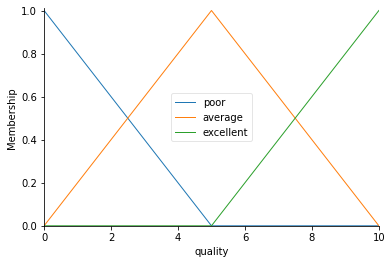

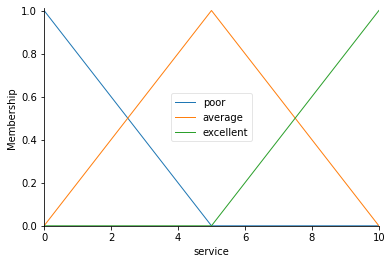

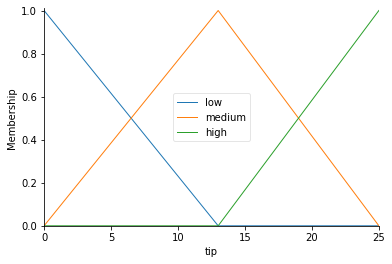

In [ ]:
# Quality and Service are defined as Antecedents with a rating from 0 to 10
# Tip is defined as a consequent in the range of 0 to 25
quality.view()
service.view()
tip.view()

#### Creating the rules



In [ ]:
# IF the service was excellent OR the food quality was excellent
# THEN the tip will be high.
rule1 = ctrl.Rule(service['excellent'] | quality['excellent'], tip['high'])  
#rule1 = ctrl.Rule(service['excellent'] & quality['excellent'], tip['high'])  

# IF the service was average
# THEN the tip will be medium.
rule2 = ctrl.Rule(service['average'], tip['medium'])

# IF the service was poor AND the food quality was poor
# THEN the tip will be low.
rule3 = ctrl.Rule(service['poor'] & quality['poor'], tip['low'])  
#rule3 = ctrl.Rule(service['poor'] | quality['poor'], tip['low'])  

# Viewing the rules
#rule1.view()
#rule2.view()
#rule3.view()

#### Control System Creation and Simulation
The next step after creating the fuzzy rules is to create objects of
1.   control system: *aggregates all rules*
2.   control system simulation: *simulates the control system to be applied for specific inputs*

In [ ]:
# Creating control system object
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

# Creating control system simulation object
tipping_simulator = ctrl.ControlSystemSimulation(tipping_ctrl)

#### Computing the Tip
Finally we compute the tip for an input of "quality" rated as 6.5 and “service” rated as 9.8.

In [ ]:
tipping_simulator.inputs({'quality':6.5,'service':9.8})
#tipping_simulator.inputs({'quality':10,'service':10})
tipping_simulator.compute()
print(f"Suggested tip would be {round(tipping_simulator.output['tip'],2)}%")

Suggested tip would be 19.85%


To visualise the result

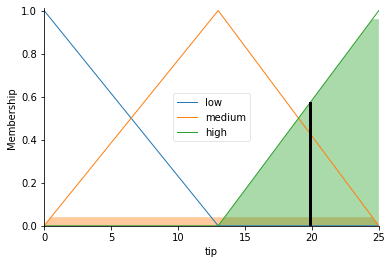

In [ ]:
tip.view(sim=tipping_simulator)

## Discussions

In this task, we used fuzzy logic to calculate tip percentage based on inputs of food quality and service ratings.<br>
> One problem that I've encountered here is that even at the maximum rating of 10 and 10, the tip percent is not reaching 25%.

**Q1.** Formulate the problem by specifying the linguistic variables, their corresponding membership functions, and the rules. <br>
> **Ans**. We can formulate the problem through the following variables and their membership functions as:
The linguistic variables are:
```
      Quality:    poor, average, excellent
      Service:    poor, average, excellent
      Tip:        low, medium, high
```
1.   Inputs (Antecedents)
  1.   service
      1.   Universe of discourse/ Crisp set: *How good was the service, on a scale of 0 to 10?*
      2.   Fuzzy Set: *poor, average, excellent*
      3.   Membership Function: 
            1.   poor: Triangular, with points at (0, 0), (0, 5), and (5, 10)
            2.   average: Triangular, with points at (0, 5), (5, 10), and (10, 10)
            3.   excellent: Triangular, with points at (5, 10), (10, 10), and (10, 0)
  2.   quality
      1.   Universe of discourse/ Crisp set: *How good was the Food quality, on a scale of 0 to 10?*
      2.   Fuzzy Set: *poor, average, excellent*
      3.   Membership Function: 
            1.   poor: Triangular, with points at (0, 0), (0, 5), and (5, 10)
            2.   average: Triangular, with points at (0, 5), (5, 10), and (10, 10)
            3.   excellent: Triangular, with points at (5, 10), (10, 10), and (10, 0)
2.   Outputs (Consequents)
  1.   tip
      1.   Universe of discourse/ Crisp set: *How much to tip, on a scale of 0% to 25%?*
      2.   Fuzzy Set: *low, medium, high*
      3.   Membership Function: 
            1.   low: Triangular, with points at (0, 0), (0, 13), and (13, 25)
            2.   medium: Triangular, with points at (0, 13), (13, 25), and (25, 25)
            3.   high: Triangular, with points at (13, 25), (25, 25), and (25, 0)

The rules for the problem are:<br>
```
      IF the service was excellent
      OR the food quality was excellent
      THEN the tip will be high.

      IF the service was average
      THEN the tip will be medium.

      IF the service was poor
      AND the food quality was poor
      THEN the tip will be low.
```

**Q2.**  Complete the program and generate a solution to the problem. <br>
> **Ans**. The completed solution is implemented in the above code. <br> The program suggests a tip of 19.85% at quality rating of 6.5 and service rating of 9.8.

**Q3.**  Discuss your solution. <br>
> **Ans**. Based on the inputs of a quality rating of 6.5 and a service rating of 9.8, the program estimates a suggested tip of 19.85%. <br>The membership function and the result of defuzzification are clearly visible on the result visualisation.






## Task 5.2 Project Risk Assessment

---

### Problem Descriptions
Develop a fuzzy system for the project risk assessment problem, to assess the risk of a project from Project Funding and Staffing.



### Implementation and Results
We solve this problem using fuzzy logic to assess the risk (on a scale of 0% to 100%), on the basis of project funding and staffing (each rated between 0% and 100%).<br>

First, we define the linguistic variables, their fuzzy sets and their membership function. We used *trapmf - trapezoidal membership function* and *trimf - triangular membership function* to create membership functions.<br>
Secondly, we created the fuzzy rules for our problem and aggregated it using fuzzy control system.<br>
Finally, by simulating the fuzzy control system for the specific inputs (funding = 35%, staffing = 60%), we compute the associated risk to be at 66.67%.

#### Importing the libraries

In [ ]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Define Linguistic variables and their membership functions

In [ ]:
# Creating new Antecedent (input) and Consequent (output) Objects

funding = ctrl.Antecedent(np.arange(0, 101, 1), 'funding')
staffing = ctrl.Antecedent(np.arange(0, 101, 1), 'staffing')
risk = ctrl.Consequent(np.arange(0, 101, 1), 'risk')
# Instead of using np.arange() we could also use range()
# np.arange() is more efficient

# Creating membership functions for individual linguistic vars
# using trapezoidal and triangular membership functions
funding['inadequate'] = fuzz.trapmf(funding.universe, [0, 0, 30, 45]) 
funding['marginal'] = fuzz.trimf(funding.universe, [30, 50, 70]) # trangular
funding['adequate'] = fuzz.trapmf(funding.universe, [55, 70, 100, 100])
staffing['small'] = fuzz.trapmf(staffing.universe, [0, 0, 25, 65])
staffing['large'] = fuzz.trapmf(staffing.universe, [35, 75, 100, 100])
risk['low'] = fuzz.trapmf(risk.universe, [0, 0, 20, 40])
risk['normal'] = fuzz.trapmf(risk.universe, [25, 45, 55, 75])
risk['high'] = fuzz.trapmf(risk.universe, [60, 80, 100, 100])


To view the membership functions

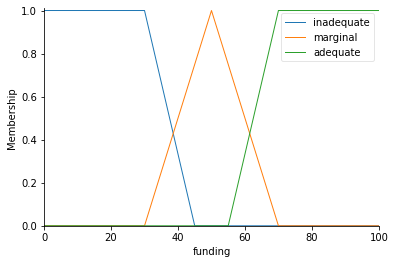

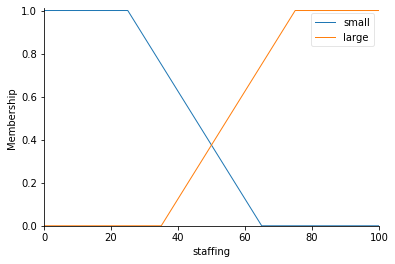

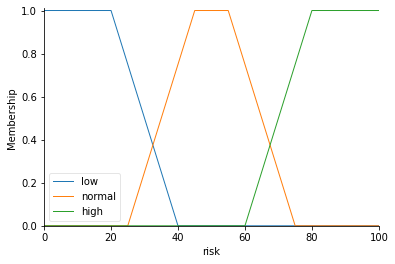

In [ ]:
funding.view()
staffing.view()
risk.view()

#### Creating rules

In [ ]:
# IF project funding is adequate OR project staffing is small
# THEN risk is low
rule1 = ctrl.Rule(funding['adequate'] | staffing['small'], risk['low'])

# IF project funding is marginal AND project staffing is large
# THEN risk is normal
rule2 = ctrl.Rule(funding['marginal'] & staffing['large'], risk['normal'])

# IF project funding is inadequate
# THEN risk is high
rule3 = ctrl.Rule(funding['inadequate'], risk['high'])

# IF project funding is inadequate
# AND project staffing is large
# THEN risk is high
rule4 = ctrl.Rule(funding['inadequate'] & staffing['large'], risk['high'])


#### Control System creating and simulation

In [ ]:
# Creating control system aggregating all rules
# For 3 Rules
#risk_ctrl = ctrl.ControlSystem([rule1,rule2,rule3])
# For 4 Rules
risk_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4])

# Creating simulation object for predicting defuzzified outputs for specific inputs
risk_ctrl_sim = ctrl.ControlSystemSimulation(risk_ctrl)

#### Computing the risk
Finally we compute the risk for inputs of Project funding at 35% and staffing at 60%.

In [ ]:
# Passing inputs to the simulation object
risk_ctrl_sim.inputs({'funding':35, 'staffing':60})
risk_ctrl_sim.compute()

# Predicting outputs for specific inputs
print(f"Project Risk for such inputs is {round(risk_ctrl_sim.output['risk'],2)}%")

Project Risk for such inputs is 66.67%


Visualizing the result

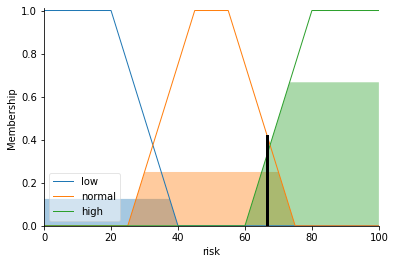

In [ ]:
risk.view(sim=risk_ctrl_sim)

## Discussions
In this task, we used fuzzy logic to assess the risk associated with project funding and staffing.<br>
**Q1.** Formulate the problem by specifying the linguistic variables, their corresponding membership functions, and the rules. <br>
> **Ans**. We can formulate the problem through the following variables and their membership functions as:<br>
First, we define the linguistic variables as:<br>
```
      Funding:     inadequate, marginal, adequate
      Staffing:    small, large
      Risk:        low, medium, high
```
*   Inputs (Antecedents)
  *   funding
      *   Universe of discourse/ Crisp set: How much is the Project funding, on a scale of 0 to 100?
      *   Fuzzy Set: inadequate, marginal, adequate
  *   staffing
      *   Universe of discourse/ Crisp set: How much is the staffing, on a scale of 0 to 100?
      *   Fuzzy Set: small, large
*   Outputs (Consequents)
  *   risk
      *   Universe of discourse/ Crisp set: How much is the risk, on a scale of 0 to 100?
      *   Fuzzy Set: low, normal, high

The membership functions are given by
```
  Funding:
    inadequate (Trapezoidal, with points at (0, 0, 30, 45))
    marginal (Triangular, with points at (30, 50, 70))
    adequate (Trapezoidal, with points at (55, 70, 100, 100))

  Staffing:
    small (Trapezoidal, with points at (0, 0, 25, 65))
    large (Trapezoidal, with points at (35, 75, 100, 100))

  Risk:
    low (Trapezoidal, with points at (0, 0, 20, 40))
    medium (Trapezoidal, with points at (25, 45, 55, 75))
    high (Trapezoidal, with points at (60, 80, 100, 100))
```
We have three rules:<br>
```
      IF project funding is adequate
      OR project staffing is small
      THEN risk is low

      IF project funding is marginal
      AND project staffing is large
      THEN risk is normal

      IF project funding is inadequate
      THEN risk is high
```

**Q2.** Complete the program<br>
> **Ans**. The completed solution is implemented in the code above.<br>

**Q3.** Assess the risk of a project for funding=35% and staffing=60%.<br>
> **Ans**. According to the program output, Project Risk is 66.67%, given project funding is at 35% and staffing is at 60%.<br>
The membership function and the result of defuzzification are clearly visible on the result visualisation.<br>

**Q4.** Add a new rule to the fuzzy system: Would the result be different? Explain it with the Mamdani fuzzy inference process.
```
      IF project funding is inadequate
      AND project staffing is large
      THEN risk is high
```
> **Ans**. According to the program output, Project Risk is 66.67%, given project funding is at 35% and staffing is at 60%.<br>
The project risk was not affected by the addition of Rule 4, as both rules 3 & 4 affect the same membership function μ(risk = high) with the same consequent membership value (0.6) evaluated during rule evaluation step as follows: 
```
Rule 3: IF project funding is inadequate (0.6) THEN risk is high (0.6)
Rule 4: IF project funding is inadequate (0.6) AND project staffing is large (0.6) THEN risk is high (0.6)
```
Hence, there is no difference in the defuzzification step, and the project risk remains 66.67%.



## Task 5.3 Washing Machine Fuzzy Controller

---

### Problem Descriptions
Develop such a fuzzy controller for washing machines that calculates washing time, from two input variables, Degree of dirtiness and Size of load.



### Implementation and Results
We solve this problem using fuzzy logic to calculate the washing time, depending on degree of dirtiness and the size of load of the clothes.<br>

First, we define the linguistic variables, their fuzzy sets and their membership function. <br>
Secondly, we created the fuzzy rules for our problem and aggregated it using fuzzy control system.<br>
Finally, by simulating the fuzzy control system for the specific inputs, we computed the associated washing time.

#### Importing the libraries

In [ ]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Defining linguistic variables and their membership function

In [ ]:
# Creating new Antecedent (input) and Consequent (output) Objects
dirtiness = ctrl.Antecedent(np.arange(0, 101, 1), 'dirtiness')
load = ctrl.Antecedent(np.arange(0, 101, 1), 'load')
time = ctrl.Consequent(np.arange(0, 61, 1), 'time')

# Creating membership functions for individual linguistic vars
# using simple triangular membership functions

dirtiness.automf(3, names=['SD', 'MD', 'LD'])
load.automf(3, names=['SL', 'ML', 'LL'])

# For Lab Task 3
time.automf(5, names=['VS','S','M','L','VL'])

# For seminar question 5
#time['VS'] = fuzz.trimf(time.universe, [0, 0, 10])
#time['S'] = fuzz.trimf(time.universe, [0, 13, 25])
#time['M'] = fuzz.trimf(time.universe, [10, 25, 40])
#time['L'] = fuzz.trimf(time.universe, [25, 40, 60])
#time['VL'] = fuzz.trimf(time.universe, [40, 60, 60])


View the membership functions

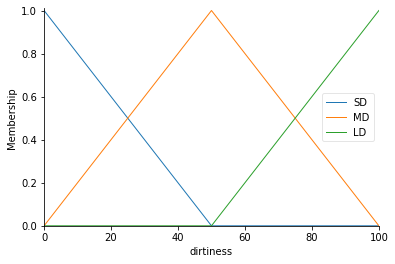

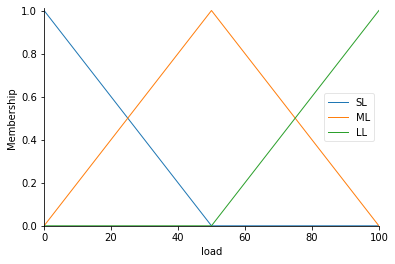

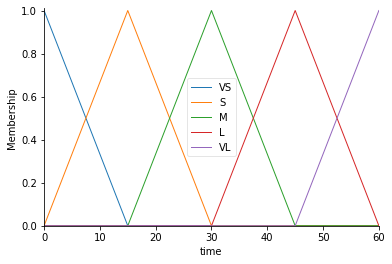

In [ ]:
dirtiness.view()
load.view()
time.view()

#### Creating Rules

In [ ]:
rules = []
# Rule 1
# IF dirtiness is SD AND load is SL THEN time is VS 
rules.append(ctrl.Rule(dirtiness['SD'] & load['SL'], time['VS']))

# Rule 2
# IF dirtiness is SD AND load is ML THEN time is M
rules.append(ctrl.Rule(dirtiness['SD'] & load['ML'], time['M']))

# Rule 3
# IF dirtiness is SD AND load is LL THEN time is L
rules.append(ctrl.Rule(dirtiness['SD'] & load['LL'], time['L']))

# Rule 4
# IF dirtiness is MD AND load is SL THEN time is S
rules.append(ctrl.Rule(dirtiness['MD'] & load['SL'], time['S']))

# Rule 5
# IF dirtiness is MD AND load is ML THEN time is M
rules.append(ctrl.Rule(dirtiness['MD'] & load['ML'], time['M']))

# Rule 6
# IF dirtiness is MD AND load is LL THEN time is L
rules.append(ctrl.Rule(dirtiness['MD'] & load['LL'], time['L']))

# Rule 7
# IF dirtiness is LD AND load is SL THEN time is M
rules.append(ctrl.Rule(dirtiness['LD'] & load['SL'], time['M']))

# Rule 8
# IF dirtiness is LD AND load is ML THEN time is L
rules.append(ctrl.Rule(dirtiness['LD'] & load['ML'], time['L']))

# Rule 9
# IF dirtiness is LD AND load is LL THEN time is VL
rules.append(ctrl.Rule(dirtiness['LD'] & load['LL'], time['VL']))

#### Creating control System and simulation

In [ ]:
# Control System
washing_ctrl = ctrl.ControlSystem(rules)

# Creating Simulation
washing_ctrl_sim = ctrl.ControlSystemSimulation(washing_ctrl)

#### Computing the washing time
Finally we compute the washing time for inputs of Dirtiness at 60% and size of load at 70%.

In [ ]:
washing_ctrl_sim.inputs({'dirtiness':60,'load':70})
washing_ctrl_sim.compute()

# Getting the output
print(f"Expected washing time for the given inputs is {round(washing_ctrl_sim.output['time'],2)}")

Expected washing time for the given inputs is 36.65


To visualize the result

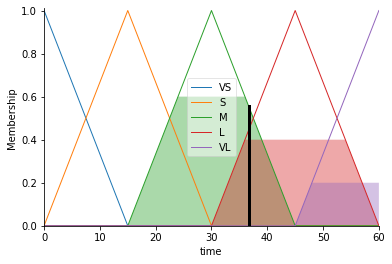

In [ ]:
time.view(sim=washing_ctrl_sim)

## Discussions
In this task, we used fuzzy logic to calculate the washing time, on the basis of dirtiness and size of the load.<br>

**Q1.** Formulate the problem by specifying the linguistic variables, their corresponding membership functions, and the rules. <br>
> **Ans**. We can formulate the problem through the following variables and their membership functions as:<br>
*   Inputs (Antecedents)
  *   **dirtiness**
      *   Universe of discourse/ Crisp set: *What's the degree of dirtiness of the clothes, on a scale of 0 to 100?*
      *   Fuzzy Set: *small, medium, large*
  *   **load**
      *   Universe of discourse/ Crisp set: *What is the size of the load of clothes, on a scale of 0 to 100?*
      *   Fuzzy Set: *small, medium, large*
*   Outputs (Consequents)
  *   **washing time**
      *   Universe of discourse/ Crisp set: *How much time will it take to wash the clothes, ranging between 0 and 60?*
      *   Fuzzy Set: *very short, short, medium, long, very long*

We define the linguistic variables as:<br>
```
      Degree of Dirtiness: SD(small), MD(medium), LD(large) 
      Size of Load of Clothes: SL(small), ML(medium), LL(large) 
      Washing Time: VS(very short), S(short), M(medium), L(large), VL(very large)
```
The membership functions are defined as:
```
     dirtiness:
          SD (Triangular, with points at (0, 0, 50))
          MD (Triangular, with points at (0, 50, 100))
          LD (Triangular, with points at (50, 100, 100))

     load:
          SL (Triangular, with points at (0, 0, 50))
          ML (Triangular, with points at (0, 50, 100))
          LL (Triangular, with points at (50, 100, 100))

     time:
          VS (Triangular, with points at (0, 0, 15))
          S (Triangular, with points at (0, 15, 30))
          M (Triangular, with points at (15, 30, 45))
          L (Triangular, with points at (30, 45, 60))
          VL (Triangular, with points at (45, 60, 60))
```
We have 9 rules:<br>
```	
      IF dirtiness is SD 
      AND load is SL 
      THEN time is VS 
			
      IF dirtiness is SD 
      AND load is ML
      THEN time is M
			
      IF dirtiness is SD 
      AND load is LL
      THEN time is L
			
      IF dirtiness is MD 
      AND load is SL
      THEN time is S
			
      IF dirtiness is MD 
      AND load is ML
      THEN time is M
			
      IF dirtiness is MD 
      AND load is LL
      THEN time is L
			
      IF dirtiness is LD 
      AND load is SL
      THEN time is M
			
      IF dirtiness is LD 
      AND load is ML
      THEN time is L
			
      IF dirtiness is LD 
      AND load is LL
      THEN time is VL
```

**Q2.** Complete the program<br>
> **Ans**. The completed solution is implemented in the code above.<br>

**Q3.** Estimate the washing time when the degree of dirtiness is 60% and the size of load is 70%.<br>
> **Ans**. According to the program output, Expected washing time when the degree of dirtiness is 60% and the size of load is 70% is 36.65.<br>
The membership function and the result of defuzzification are clearly visible in the result visualisation step.<br>
